In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("data.xlsx" , converters= {"year":str , "sem" : str , "section" : str})


In [4]:
df

,ข้อคำถาม,5,5(%),4,4(%),3,3(%),2,2(%),1,...,subject,section,นักศึกษาที่จดทะเบียน,นักศึกษาที่ประเมิน,url,year,sem,n,class,situation
0,สอนอย่างเป็นระบบ,4,66.67,1,16.67,0,0.00,1,16.67,0,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
1,สอนให้คิด วิเคราะห์ วิจารณ์,4,66.67,0,0.00,1,16.67,1,16.67,0,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
2,กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าส...,2,33.33,1,16.67,1,16.67,1,16.67,1,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
3,เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบก...,3,50.00,2,33.33,0,0.00,0,0.00,1,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
4,มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท...,3,50.00,2,33.33,1,16.67,0,0.00,0,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการ...,15,51.72,9,31.03,3,10.34,2,6.90,0,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal
320,โสตทัศนูปกรณ์ช่วยสอนในห้องเรียน เช่น ไมโครโฟน ...,14,48.28,8,27.59,5,17.24,1,3.45,1,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal
321,สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุ...,13,44.83,11,37.93,4,13.79,0,0.00,1,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal
322,จำนวนอุปกรณ์ในการเรียนการสอนเพียงพอ และเหมาะสม...,15,51.72,6,20.69,5,17.24,0,0.00,3,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal


# N Distribution

<AxesSubplot:xlabel='n', ylabel='Density'>

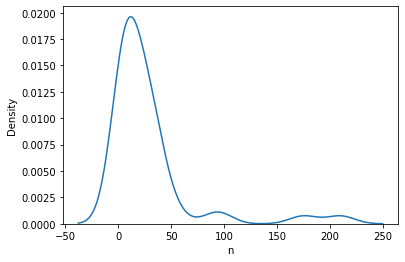

In [5]:
sns.kdeplot(df["n"].sort_values())

Text(0.5, 1.0, 'N')

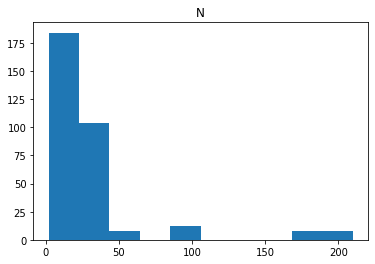

In [6]:

plt.hist(df["n"])
plt.title("N")

In [7]:
pvt = df.pivot_table(index=["year","sem","subject","section","situation"] , values="x_bar" , aggfunc="mean")
pvt.reset_index(inplace=True)


## Distribution of X-Bar each year

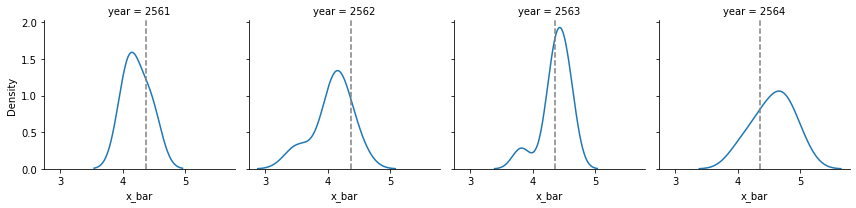

In [8]:
g = sns.FacetGrid(pvt , col ="year")
g.map(sns.kdeplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

In [9]:
detail = df.groupby("year").x_bar.describe()
detail.reset_index(inplace= True)
detail.to_excel("year.xlsx" )

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


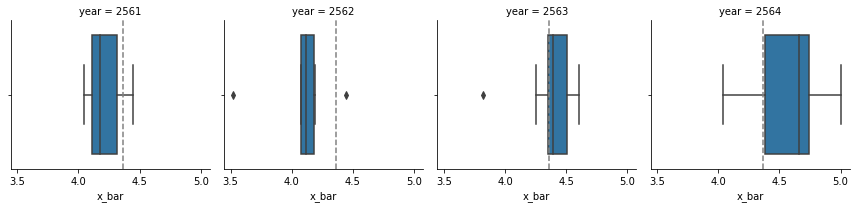

In [10]:
g = sns.FacetGrid(pvt , col = "year")
g.map(sns.boxplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


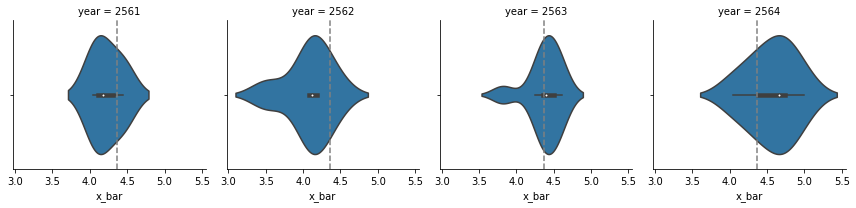

In [11]:
g = sns.FacetGrid(pvt , col = "year")
g.map(sns.violinplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

## Distribution of X-Bar each situation

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


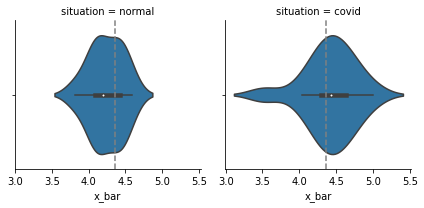

In [12]:
g = sns.FacetGrid(pvt , col = "situation" )
g.map(sns.violinplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

## Ploting IQR each year

In [13]:
Q_75 = df.pivot_table(index='year',values="x_bar", aggfunc=lambda x: np.quantile(x, 0.75))
Q_25 = df.pivot_table(index='year',values="x_bar", aggfunc=lambda x: np.quantile(x, 0.25))

Q_25.reset_index(inplace= True)
Q_25.rename(columns={"x_bar":"Q25"} , inplace= True)
Q_75.reset_index(inplace= True)
Q_75.rename(columns={"x_bar":"Q75"} , inplace= True)

IQR = pd.merge(Q_25 , Q_75 , on= "year")
IQR["IQR"] = IQR["Q75"] - IQR["Q25"]

IQR

,year,Q25,Q75,IQR
0,2561,4.0000,4.5700,0.5700
1,2562,3.9075,4.5000,0.5925
2,2563,4.2475,4.5925,0.3450
3,2564,4.4050,4.7900,0.3850


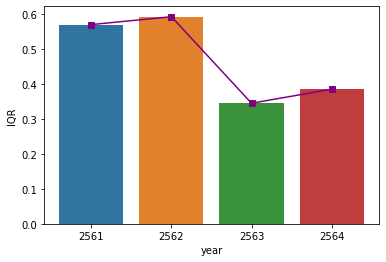

In [14]:
sns.barplot(data = IQR , x="year" , y="IQR")
plt.plot(IQR["year"], IQR["IQR"] , color = "purple" , marker = "s")

## Skewed - Right Distribution

* From this chart have 2 skewed right distribution , 2561 and 2562

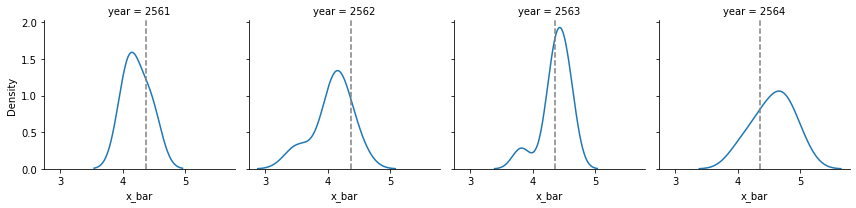

In [15]:
g = sns.FacetGrid(pvt , col ="year")
g.map(sns.kdeplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

In [16]:
one = df[df["year"] == "2561"]
two = df[df["year"] == "2562"]

In [17]:
one.pivot_table(index= [ "sem", "subject" , "section"] , values= ["x_bar"])

x_bar
sem subject section          
2   NVI781  231863   4.450500
    RMW014  556574   4.173333
    YRY790  231863   4.042500

In [18]:
pvt = two.pivot_table(index= [ "sem", "subject" , "section"] , values= ["x_bar"])
pvt.reset_index(inplace= True)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, '2561')

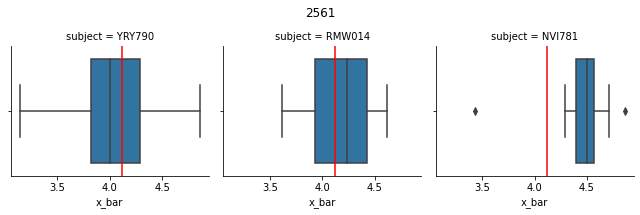

In [19]:
g = sns.FacetGrid(one , col= "subject" )
g.map(sns.boxplot , "x_bar")
g.refline(x=pvt["x_bar"].median(), color= "r" , linestyle="-")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("2561")

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, '2562')

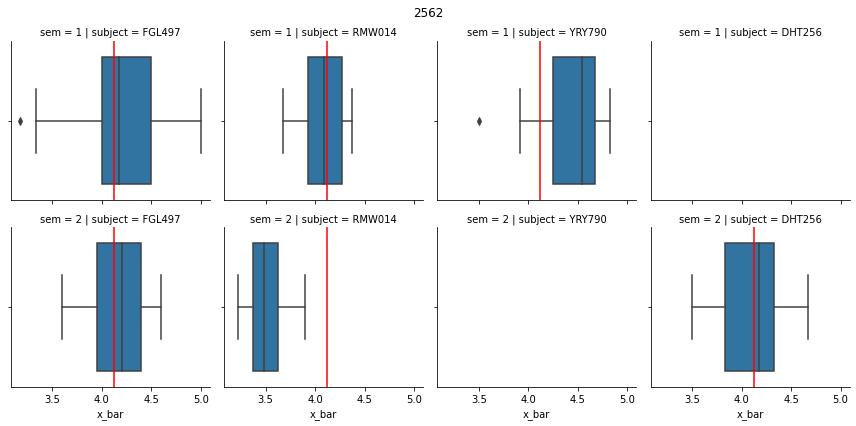

In [20]:
g = sns.FacetGrid(two , col= "subject" ,row="sem")
g.map(sns.boxplot , "x_bar")
g.refline(x=pvt["x_bar"].median() , color= "r" , linestyle="-" )

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("2562")

## Topic

In [21]:
df.groupby("topic").x_bar.describe()

,count,mean,std,min,25%,50%,75%,max
topic,,,,,,,,
ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,208.0,4.293173,0.417676,2.88,4.0000,4.355,4.6025,5.00
ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน,72.0,4.461250,0.345184,3.38,4.2875,4.525,4.7100,5.00
ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้,44.0,4.137727,0.366002,3.17,4.0000,4.245,4.3800,4.62


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


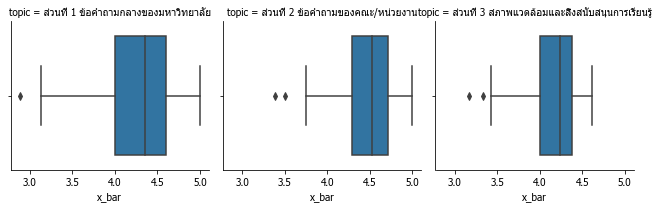

In [22]:
plt.rcParams.update({"font.family":"tahoma"})
g = sns.FacetGrid(df, col = "topic")
g.map(sns.boxplot , "x_bar")

In [23]:
df["นักศึกษาที่ประเมิน(n)"] = ""

In [24]:
for i in range(len(df["นักศึกษาที่ประเมิน"]))   : 
    df["นักศึกษาที่ประเมิน(n)"][i] = df["นักศึกษาที่ประเมิน"][i].split()[0]
df["นักศึกษาที่ประเมิน(n)"] = pd.to_numeric(df["นักศึกษาที่ประเมิน(n)"] )

C:\Users\User\AppData\Local\Temp\ipykernel_4300\3739083856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["นักศึกษาที่ประเมิน(n)"][i] = df["นักศึกษาที่ประเมิน"][i].split()[0]


In [57]:
pvt = df.pivot_table(index=["year","sem","subject","section","n" ,"นักศึกษาที่จดทะเบียน"] , values= "x_bar")

In [58]:
pvt

x_bar
year sem subject section n   นักศึกษาที่จดทะเบียน          
2561 2   NVI781  231863  7   44                    4.450500
         RMW014  556574  30  326                   4.173333
         YRY790  231863  7   44                    4.042500
2562 1   FGL497  231863  6   43                    4.191500
         RMW014  556574  94  501                   4.075833
         YRY790  231863  12  50                    4.441500
     2   DHT256  270981  6   12                    4.091500
         FGL497  231863  5   50                    4.150000
         RMW014  556574  210 511                   3.520000
2563 1   DRI970  231863  29  43                    4.417000
                 728025  25  47                    4.582500
         NYE553  231863  29  43                    4.351500
         YRY790  728025  9   44                    3.817500
     2   AZW892  231863  5   43                    4.375000
         FGL497  231863  6   44                    4.605000
                 696574  4   41                    4.250000
                 728025  10  45                    4.350000
         NVI781  231863  8   46                    4.517500
         RMW014  556574  175 560                   4.480000
2564 1   DRI970  231863  53  127                   4.425000
         NVI781  231863  35  64                    4.661250
         NYE553  231863  15  46                    4.776250
         XCM602  231863  2   14                    5.000000
         YRY790  231863  34  64                    4.037500
     2   AZW892  231863  33  46                    4.706250
         FGL497  231863  41  66                    4.338750

In [59]:
pvt.reset_index(inplace= True)
pvt["n_appear"] = 0

Text(0, 0.5, 'จำนวนครั้งที่ถูกบันทึก')

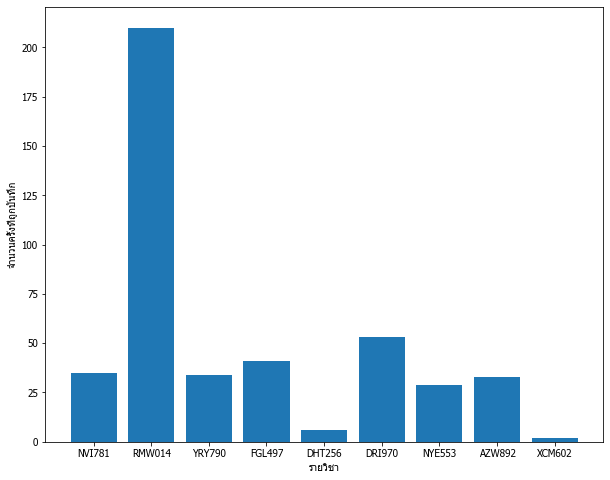

In [29]:
plt.rcParams.update({"font.family":"tahoma"})
plt.figure(figsize=(10, 8))

plt.bar(pvt["subject"] , height= pvt["n"])
plt.xlabel("รายวิชา")
plt.ylabel("จำนวนครั้งที่ถูกบันทึก")